## Free fermions

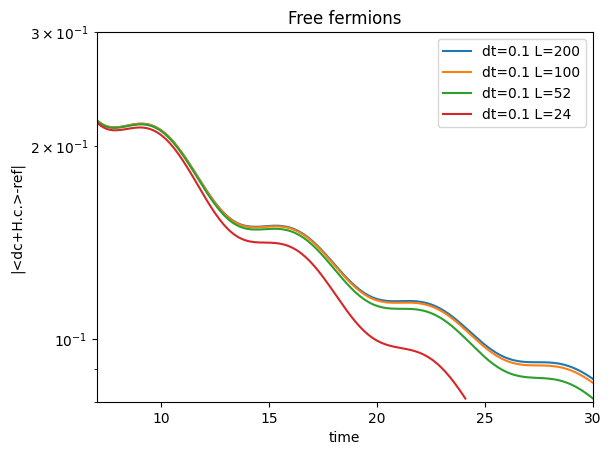

In [172]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
plt.title("Free fermions")
plt.xlabel("time")
plt.ylabel("|<dc+H.c.>-ref|")
plt.yscale("log")

lt='-'
cdRef=0 #-0.605161974173456
dt=0.1
for L in [200,100,52,24]: 
    n0=np.loadtxt(f"dt{dt}/free/free_L{L}.txt", skiprows=1)
    #plt.plot(n0[:,0],[abs(x-0.5) for x in n0[:,4]], lt, label=f"dt={dt} L={L}")
    plt.plot(n0[:,0],[abs(x+0.5) for x in n0[:,5]], lt, label=f"dt={dt} L={L}")

plt.xlim(7,30)
plt.ylim(0.08, 0.3)
plt.legend()

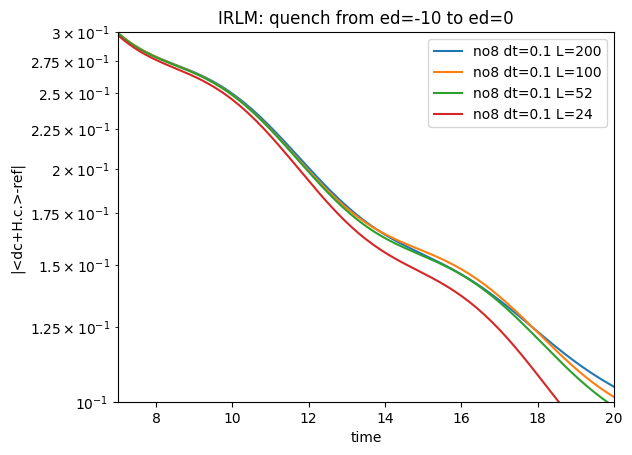

In [169]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
plt.title("IRLM: quench from ed=-10 to ed=0")
plt.xlabel("time")
plt.ylabel("|<dc+H.c.>-ref|")
plt.yscale("log")

lt='-'
cdRef=-0.605161974173456
for type in ["no8"]:
    for dt in [0.1]:
        for L in [200,100,52,24]:
            #cc=np.loadtxt(f"dt{dt}/tdvp_{type}/L{L}/cc_L{L}_gs2.txt")
            #cd=cc[0,1]+cc[1,0]
            #print(L,cd)
    
            t2='no'
            if type=='chain': t2='star'
            n0=np.loadtxt(f"dt{dt}/tdvp_{type}/L{L}/irlm_{t2}_L{L}.txt", skiprows=1)
            plt.plot(n0[:,0],[abs(x-cdRef) for x in n0[:,5]], lt, label=f"{type} dt={dt} L={L}")
        lt='--'

plt.xlim(7,20)
plt.ylim(0.1, 0.3)
plt.legend()

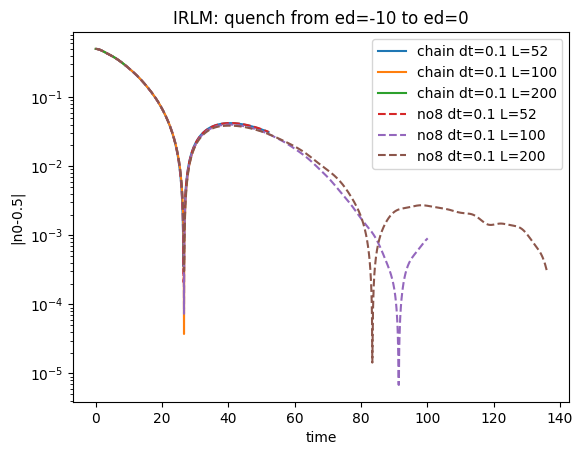

In [136]:
plt.title("IRLM: quench from ed=-10 to ed=0")
plt.xlabel("time")
plt.ylabel("|n0-0.5|")
plt.yscale("log")
lt='-'
for type in ['chain','no8']:
    t2='no'
    if type=='chain': t2='star'
    for dt in [0.1]:
        for L in [52,100,200]:    
            n0=np.loadtxt(f"dt{dt}/tdvp_{type}/L{L}/irlm_{t2}_L{L}.txt", skiprows=1)
            plt.plot(n0[:,0],[abs(x-0.5) for x in n0[:,4]], lt, label=f"{type} dt={dt} L={L}")
        lt='--'

#plt.xlim(20,22)
#plt.ylim(0.04,0.07)
plt.legend()

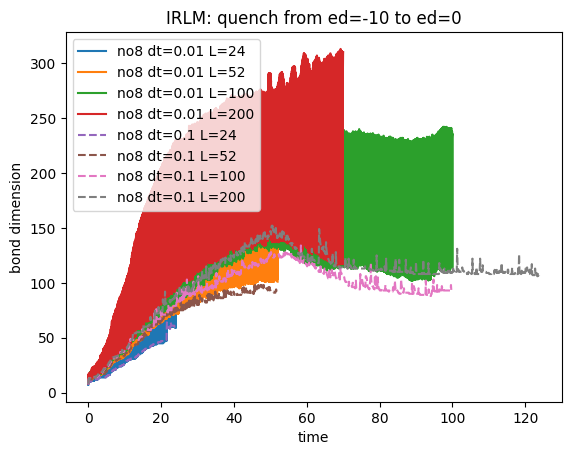

In [43]:
plt.title("IRLM: quench from ed=-10 to ed=0")
plt.xlabel("time")
plt.ylabel("bond dimension")
type='no8'
lt='-'
for dt in [0.01,0.1]:
    for L in [24,52,100,200]:    
        n0=np.loadtxt(f"dt{dt}/tdvp_{type}/L{L}/irlm_no_L{L}.txt", skiprows=1)
        plt.plot(n0[:,0],n0[:,2], lt, label=f"{type} dt={dt} L={L}")
    lt='--'
        
plt.legend(loc='upper left')

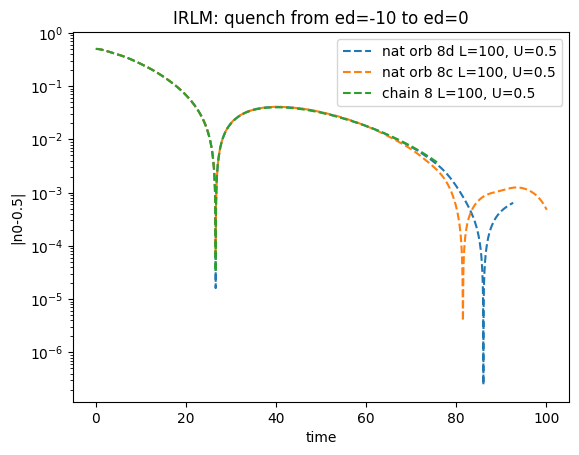

In [73]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
plt.title("IRLM: quench from ed=-10 to ed=0")
plt.xlabel("time")
plt.ylabel("|n0-0.5|")
plt.yscale("log")
for L in [100]:
    n07=np.loadtxt(f"tdvp_no8_dt0.01d/L{L}/irlm_no_L{L}.txt", skiprows=1)
    plt.plot(n07[:,0],[abs(x-0.5) for x in n07[:,4]], '--', label=f"nat orb 8d L={L}, U=0.5")

    n07=np.loadtxt(f"tdvp_no8_dt0.1c/L{L}/irlm_no_L{L}.txt", skiprows=1)
    plt.plot(n07[:,0],[abs(x-0.5) for x in n07[:,4]], '--', label=f"nat orb 8c L={L}, U=0.5")


    n07=np.loadtxt(f"tdvp_chain_dt0.01/L{L}/irlm_star_L{L}.txt", skiprows=2)
    plt.plot(n07[:,0],[abs(x-0.5) for x in n07[:,4]], '--', label=f"chain 8 L={L}, U=0.5")
        
plt.legend()

(1e-10, 0.08303624804299045)

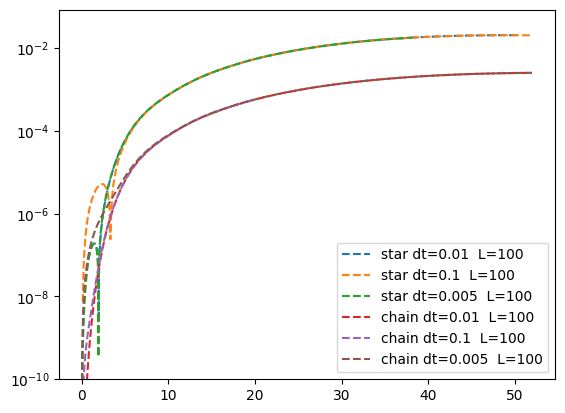

In [77]:
plt.yscale("log")

lab=''

for type in ['star','chain']:
    for L in [100]: 
        for dt in [0.01,0.1,0.005]:
            L1=52
            n00=np.loadtxt(f"tdvp_{type}_dt{dt}{lab}/L{L1}/irlm_star_L{L1}.txt", skiprows=2)#[::round(0.1/dt),:]
            
            n0=np.loadtxt(f"tdvp_{type}_dt{dt}{lab}/L{L}/irlm_star_L{L}.txt", skiprows=2)#[::round(0.1/dt),:]
            ti=min(len(n0),len(n00))
            plt.plot(n0[:ti,0],[abs(x) for x in (n0[:ti,4]-n00[:ti,4])], '--', label=f"{type} dt={dt} {lab} L={L}")
plt.legend()
plt.ylim(1e-10)

(1e-05, 0.002678362766443244)

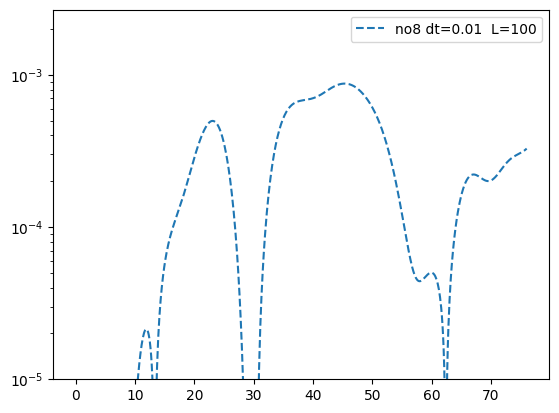

In [78]:
plt.yscale("log")

lab=''

L1=100
dt=0.01
n00=np.loadtxt(f"tdvp_chain_dt{dt}{lab}/L{L1}/irlm_star_L{L1}.txt", skiprows=2)[::round(0.1/dt),:]
for type in ['no8']:
    for L in [100]: 
        for dt in [0.01]: 
            n0=np.loadtxt(f"tdvp_{type}_dt{dt}d/L{L}/irlm_no_L{L}.txt", skiprows=2)[::round(0.1/dt),:]
            ti=min(len(n0),len(n00))
            plt.plot(n0[:ti,0],[abs(x) for x in (n0[:ti,4]-n00[:ti,4])], '--', label=f"{type} dt={dt} {lab} L={L}")
plt.legend()
plt.ylim(1e-5)

(1e-07, 0.007388688691069419)

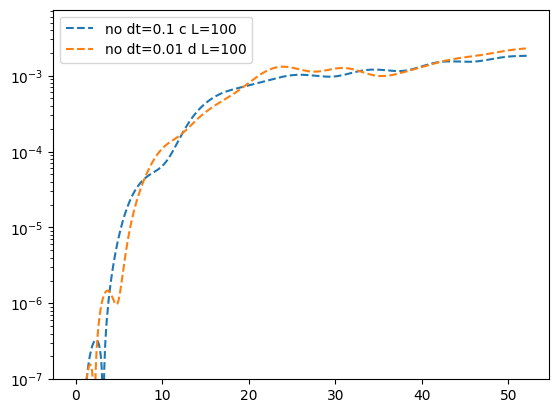

In [339]:
plt.yscale("log")


for lab,dt in [['c',0.1], ['d',0.01]]:
    L=52
    type='no'
    n00=np.loadtxt(f"tdvp_{type}8_dt{dt}{lab}/L{L}/irlm_{type}_L{L}.txt", skiprows=2)[::round(0.1/dt),:]
    
    L=100
    type='no'  
    if lab=='d' and not dt==0.01: continue
    n0=np.loadtxt(f"tdvp_{type}8_dt{dt}{lab}/L{L}/irlm_{type}_L{L}.txt", skiprows=2)[::round(0.1/dt),:]
    n0Ref=n00
    ti=min(len(n0),len(n0Ref))
    plt.plot(n0[:ti,0],[abs(x) for x in (n0[:ti,4]-n0Ref[:ti,4])], '--', label=f"{type} dt={dt} {lab} L={L}")
plt.legend()
plt.ylim(1e-7)

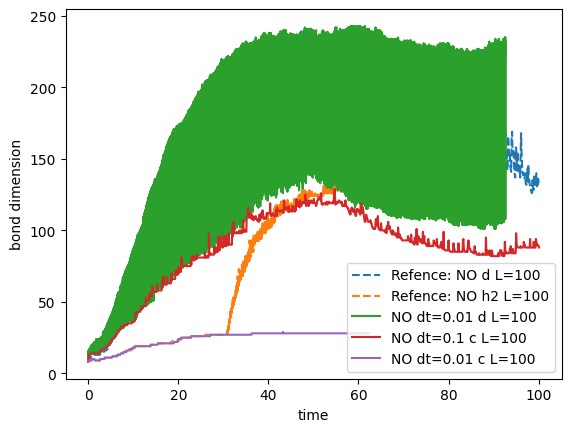

In [398]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
plt.xlabel("time")
plt.ylabel("bond dimension")

for L,lab in [[100,'d'],[100,'h2']]:
    n0=np.loadtxt(f"tdvp_no8{lab}/L{L}/irlm_no_L{L}.txt", skiprows=1)
    plt.plot(n0[:,0],n0[:,2], '--', label=f"Refence: NO {lab} L={L}")

for lab in ['d','c'
        ]:
    for L in [100]:
        for dt in [0.1,0.01]:
            if lab=='d' and not dt==0.01: continue
            n0=np.loadtxt(f"tdvp_no8_dt{dt}{lab}/L{L}/irlm_no_L{L}.txt", skiprows=1)
            plt.plot(n0[:,0],n0[:,2], '-', label=f"NO dt={dt} {lab} L={L}")

lab=''
#for L in [52,100]:
#    for dt in [0.1,0.01,0.005]:
#        if lab=='d' and not dt==0.01: continue
#        n0=np.loadtxt(f"tdvp_star_dt{dt}{lab}/L{L}/irlm_star_L{L}.txt", skiprows=2)
#        plt.plot(n0[:,0],n0[:,2], '-', label=f"star dt={dt} {lab} L={L}")
            
plt.legend()

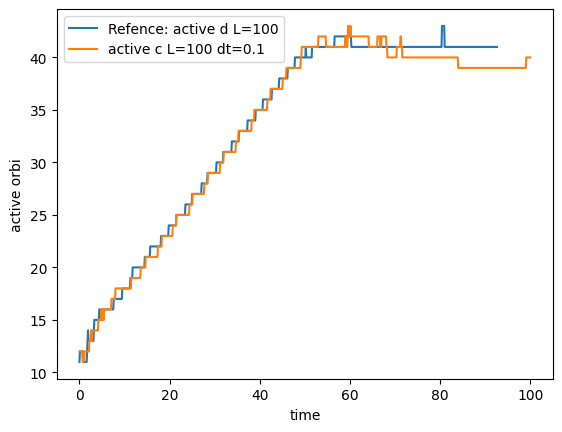

In [428]:
plt.xlabel("time")
plt.ylabel("active orbi")

for L,lab in [[100,'d']]:
    active=np.loadtxt(f"tdvp_no8_dt0.01{lab}/L{L}/active.txt")
    ti=[dt*i for i in range(len(active))]
    plt.plot(ti,active, label=f"Refence: active {lab} L={L}")

for lab in ['c']:
    for L in [100]:
        for dt in [ 0.1]:
            active=np.loadtxt(f"tdvp_no8_dt{dt}{lab}/L{L}/active.txt")
            ti=[dt*i for i in range(len(active))]
            plt.plot(ti,active, label=f"active {lab} L={L} dt={dt}")
plt.legend()